## **Phase 1: Week 1 - Project Kick-off and Data Collection**
Objectives:
Data Collection: Retrieve the customer dataset.

Data Preprocessing: Cleanse and preprocess the dataset, addressing any missing values, outliers, or necessary data transformations.

Exploratory Data Analysis (EDA): Perform initial EDA to understand the dataset's structure and gain insights

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection: Load the provided train and test datasets

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Load the datasets
train_path = '/content/drive/My Drive/Datasets/Train.csv'
test_path = '/content/drive/My Drive/Datasets/Test.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

## Basic info

In [4]:
train_df.shape

(31647, 18)

In [5]:
test_df.shape

(13564, 17)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [8]:
train_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome',
       'term_deposit_subscribed'],
      dtype='object')

In [9]:
test_df.columns

Index(['id', 'customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'days_since_prev_campaign_contact',
       'num_contacts_prev_campaign', 'prev_campaign_outcome'],
      dtype='object')

In [10]:
# Display unique value counts of important features (assuming 'job', 'marital', 'education' as important features)
train_unique_counts = train_df[['job_type', 'marital', 'education']].nunique()
test_unique_counts = test_df[['job_type', 'marital', 'education']].nunique()

In [11]:
train_unique_counts

job_type     12
marital       3
education     4
dtype: int64

In [12]:
test_unique_counts

job_type     12
marital       3
education     4
dtype: int64

In [13]:
# Display the count of missing values before handling them
train_missing_before = train_df.isnull().sum()
test_missing_before = test_df.isnull().sum()

In [15]:
train_missing_before

id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

In [16]:
test_missing_before

id                                      0
customer_age                          270
job_type                                0
marital                                81
education                               0
default                                 0
balance                               181
housing_loan                            0
personal_loan                          74
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 122
num_contacts_in_campaign               45
days_since_prev_campaign_contact    11123
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
dtype: int64

# Handling Missing Values:

In [17]:
train_df['customer_age'].fillna(train_df['customer_age'].mean(), inplace=True)
train_df['balance'].fillna(train_df['balance'].mean(), inplace=True)
train_df['last_contact_duration'].fillna(train_df['last_contact_duration'].mean(), inplace=True)
train_df['num_contacts_in_campaign'].fillna(train_df['num_contacts_in_campaign'].mean(), inplace=True)
train_df['days_since_prev_campaign_contact'].fillna(train_df['days_since_prev_campaign_contact'].mean(), inplace=True)
train_df['marital'].fillna(train_df['marital'].mode()[0], inplace=True)
train_df['personal_loan'].fillna(train_df['personal_loan'].mode()[0], inplace=True)

In [18]:
test_df['customer_age'].fillna(test_df['customer_age'].mean(), inplace=True)
test_df['balance'].fillna(test_df['balance'].mean(), inplace=True)
test_df['last_contact_duration'].fillna(test_df['last_contact_duration'].mean(), inplace=True)
test_df['num_contacts_in_campaign'].fillna(test_df['num_contacts_in_campaign'].mean(), inplace=True)
test_df['days_since_prev_campaign_contact'].fillna(test_df['days_since_prev_campaign_contact'].mean(), inplace=True)
test_df['marital'].fillna(test_df['marital'].mode()[0], inplace=True)
test_df['personal_loan'].fillna(test_df['personal_loan'].mode()[0], inplace=True)

In [19]:
train_missing_after = train_df.isnull().sum()
test_missing_after = test_df.isnull().sum()

In [20]:
print("Train missing values before:", train_missing_before)
print("Train missing values after:", train_missing_after)
print("Test missing values before:", test_missing_before)
print("Test missing values after:", test_missing_after)

Train missing values before: id                                      0
customer_age                          619
job_type                                0
marital                               150
education                               0
default                                 0
balance                               399
housing_loan                            0
personal_loan                         149
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 311
num_contacts_in_campaign              112
days_since_prev_campaign_contact    25831
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64
Train missing values after: id                                  0
customer_age                        0
job_type                            0
marital                             0
education             

## Handling Outliers

In [21]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else lower_bound if x < lower_bound else x)

In [22]:
# List of numerical columns to check for outliers
numerical_columns = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']


In [23]:
# Handle outliers for train dataset
for column in numerical_columns:
    handle_outliers(train_df, column)

In [24]:
# Handle outliers for test dataset
for column in numerical_columns:
    handle_outliers(test_df, column)

## Encoding Categorical Features

In [25]:
# One-hot encode categorical features
train_df_encoded = pd.get_dummies(train_df, columns=['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome'])
test_df_encoded = pd.get_dummies(test_df, columns=['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome'])


In [26]:
train_df_encoded.head()

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,term_deposit_subscribed,job_type_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_43823,28.0,285.0,26,303.0,4.0,224.995186,0,0,False,...,True,False,False,False,False,False,False,False,False,True
1,id_32289,34.0,934.0,18,143.0,2.0,224.995186,1,0,False,...,False,False,False,True,False,False,False,True,False,False
2,id_10523,46.0,656.0,5,101.0,4.0,224.995186,0,0,False,...,False,False,False,False,False,False,False,False,False,True
3,id_43951,34.0,2.0,20,127.0,3.0,224.995186,0,0,False,...,False,False,True,False,False,False,False,False,False,True
4,id_40992,41.0,1352.0,13,49.0,2.0,224.995186,0,0,False,...,False,False,True,False,False,False,False,False,False,True


In [27]:
test_df_encoded.head()

,id,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_failure,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,id_17231,55.0,3475.625,13,90.0,2.0,223.582958,0,False,False,...,False,False,False,False,False,False,False,False,False,True
1,id_34508,24.0,179.000,18,63.0,2.0,223.582958,0,False,True,...,False,False,True,False,False,False,False,False,False,True
2,id_44504,46.0,143.000,8,208.0,1.0,223.582958,0,False,False,...,False,False,False,False,False,False,False,False,False,True
3,id_174,56.0,3475.625,6,34.0,1.0,223.582958,0,False,False,...,True,False,False,False,False,False,False,False,False,True
4,id_2115,62.0,2913.000,12,127.0,1.0,223.582958,1,False,False,...,False,False,False,False,False,False,False,False,True,False


## Exploratory Data Analysis (EDA)

Distribution Plots

In [28]:
# Plot distributions for important features
important_features = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']

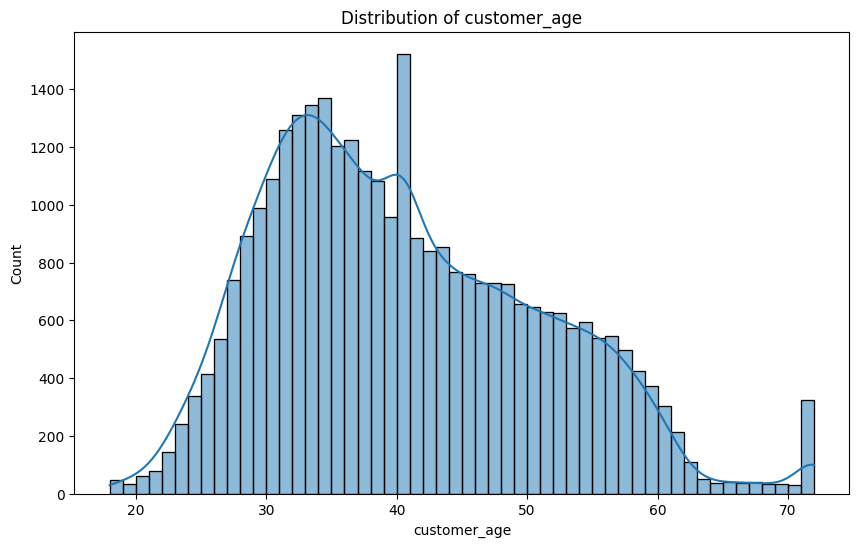

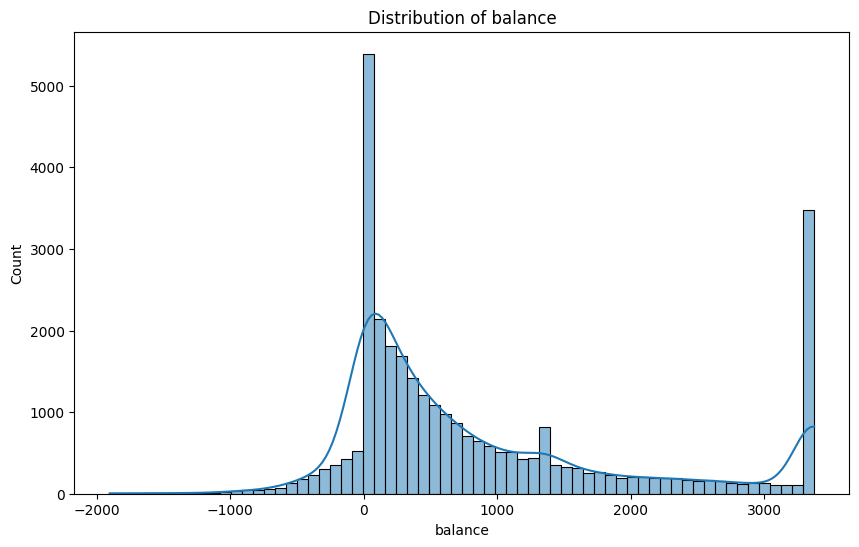

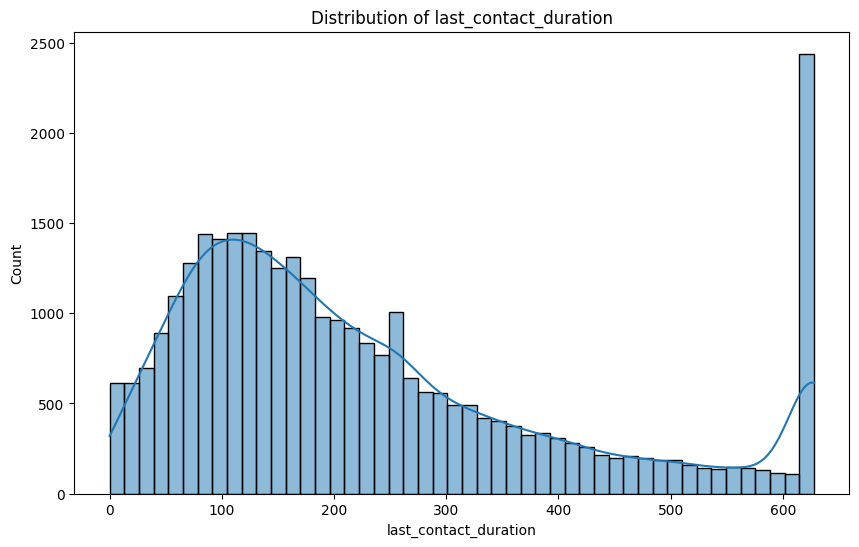

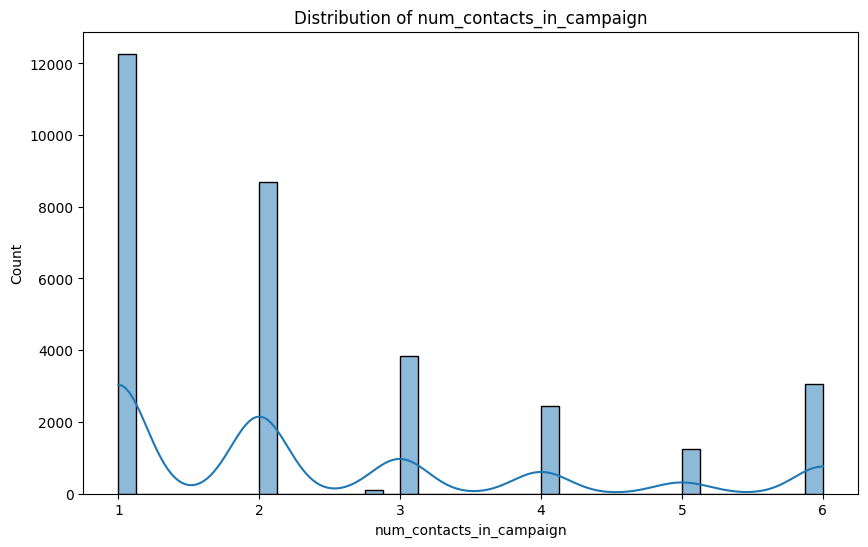

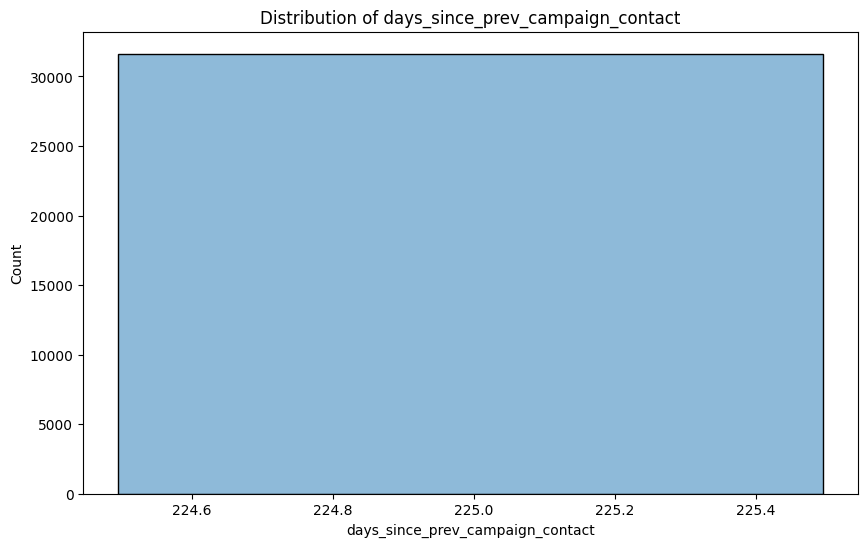

In [29]:
for feature in important_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Dropping Unnecessary Columns

Identify and drop columns that are not useful for clustering.

In [30]:
# Example: Dropping 'id' column as it is not useful for clustering
train_df.drop(columns=['id'], inplace=True)
test_df.drop(columns=['id'], inplace=True)


## Algorithm Selection

# K-means Clustering

In [55]:
# Select relevant features
selected_features = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign', 'days_since_prev_campaign_contact']
train_selected = train_df[selected_features]

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_selected)

In [58]:
from sklearn.cluster import KMeans

In [59]:
def plot_elbow_method(data, max_k=10):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k+1), wcss, marker='o')
    plt.title('Elbow Method to Determine Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

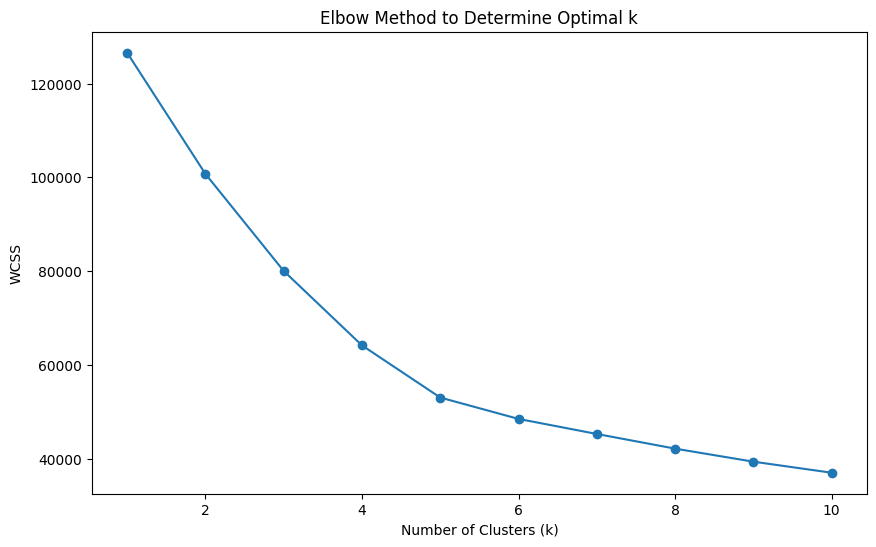

In [60]:
# Plot the elbow method for the scaled data
plot_elbow_method(scaled_data, max_k=10)


# Fit K-means with Optimal k:

In [61]:
optimal_k = 4  # Assuming we found 4 as the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_clusters = kmeans.fit_predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [64]:
# Fit DBSCAN and evaluate
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(scaled_data)

In [65]:
# Silhouette score to compare clustering performance
kmeans_silhouette = silhouette_score(scaled_data, kmeans_clusters)
dbscan_silhouette = silhouette_score(scaled_data, dbscan_clusters)

In [66]:
print(f'K-means Silhouette Score: {kmeans_silhouette}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')


K-means Silhouette Score: 0.2997858931692924
DBSCAN Silhouette Score: -0.008181182976744661


In [67]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_components = pca.fit_transform(scaled_data)

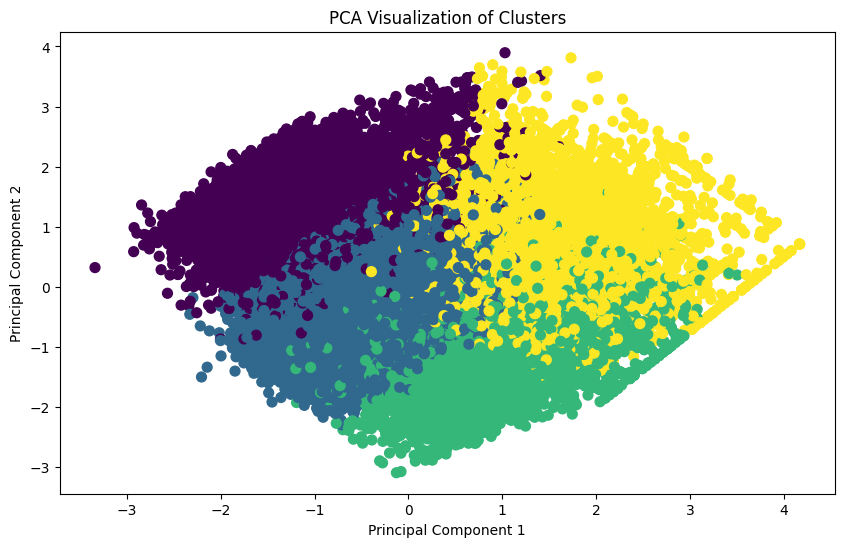

In [68]:
# Plot PCA components
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_clusters, cmap='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Clusters')
plt.show()

In [69]:
# Display PCA dataframe
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
print(pca_df.head())

        PC1       PC2
0 -1.114837 -0.479882
1 -0.420623 -0.225716
2 -0.652986  1.191449
3 -1.233550 -0.067687
4 -0.128524  0.541497


# Training K-means

In [71]:

# Assuming optimal_k was determined in Week 2
optimal_k =4

In [72]:
# Train K-means on the scaled train data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [73]:
# Predict clusters for train data
train_clusters_kmeans = kmeans.predict(scaled_data)

## Training DBSCAN

In [74]:
from sklearn.cluster import DBSCAN

# Train DBSCAN on the scaled train data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(scaled_data)

DBSCAN()

In [75]:
# Predict clusters for train data
train_clusters_dbscan = dbscan.labels_

In [76]:
# Select relevant features from test data
test_selected = test_df[selected_features]

In [78]:
# Scale the test data
scaled_test_data = scaler.transform(test_selected)

In [79]:
# Predict clusters for test data using K-means
test_clusters_kmeans = kmeans.predict(scaled_test_data)

In [80]:
# Predict clusters for test data using DBSCAN
test_clusters_dbscan = dbscan.fit_predict(scaled_test_data)

In [81]:
# PCA for visualization
pca_test = PCA(n_components=2)
pca_test_components = pca_test.fit_transform(scaled_test_data)

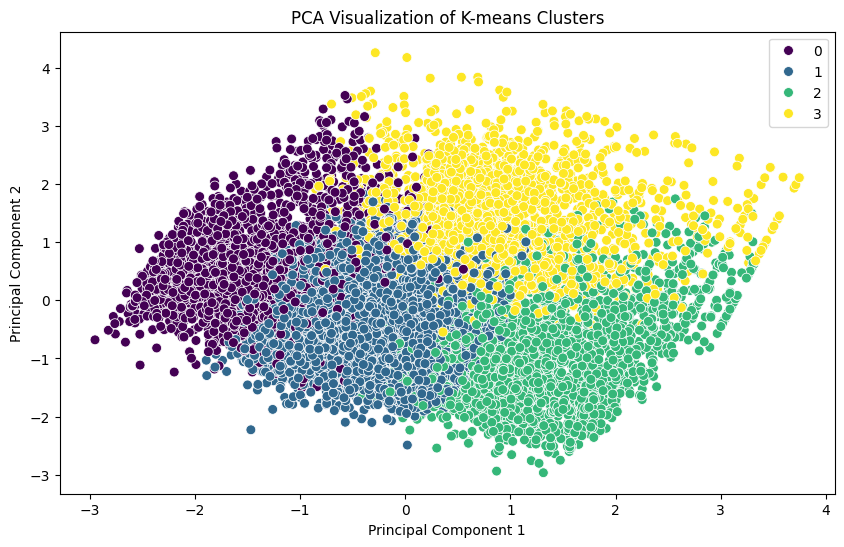

In [82]:
# Plot PCA components with K-means clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_test_components[:, 0], y=pca_test_components[:, 1], hue=test_clusters_kmeans, palette='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of K-means Clusters')
plt.show()

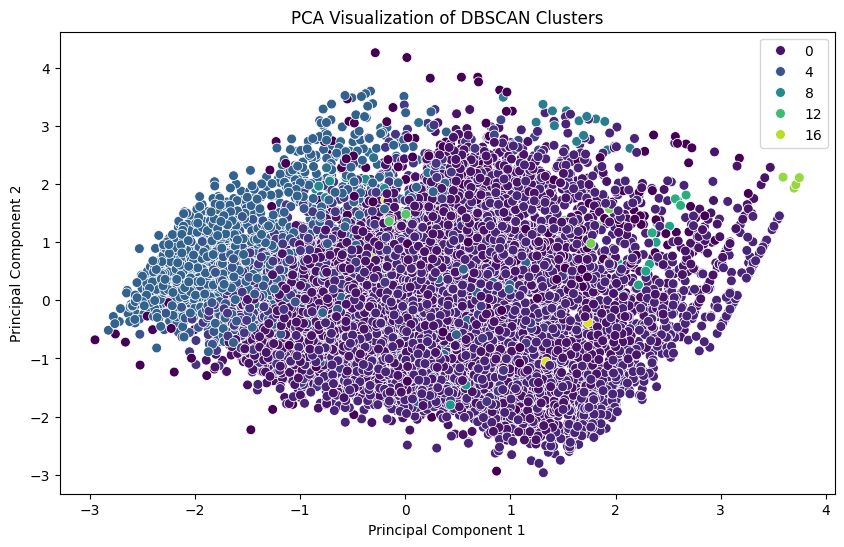

In [83]:
# Plot PCA components with DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_test_components[:, 0], y=pca_test_components[:, 1], hue=test_clusters_dbscan, palette='viridis', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of DBSCAN Clusters')
plt.show()